In [3]:
from gal4H0 import *
from scipy.stats import gaussian_kde
from scipy.stats import binom
np.random.seed(12) # Random seed

### One galaxy, with redshift errors, approximate likelihood

0.01012914294792838 0.03


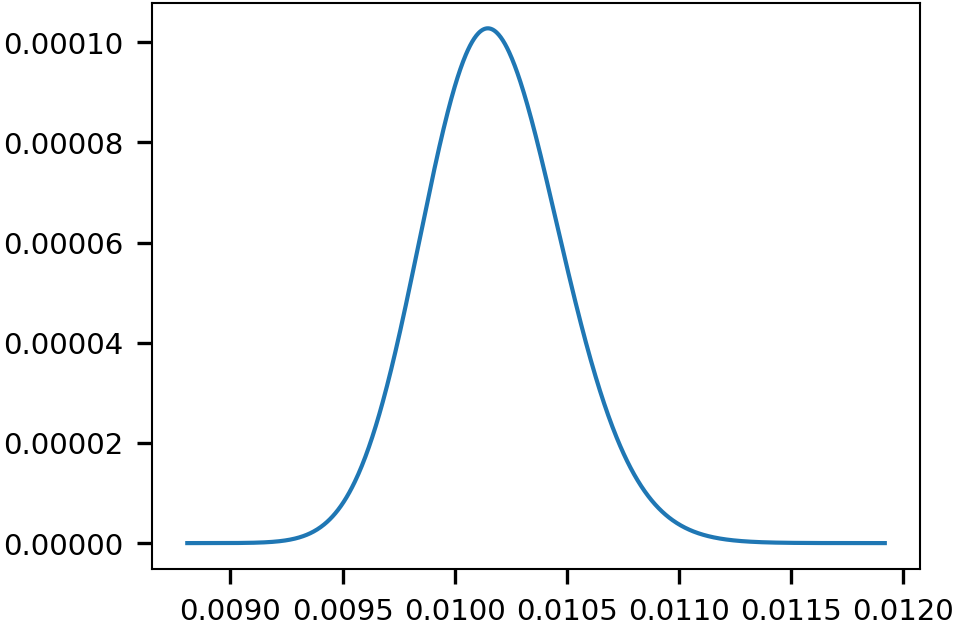

In [9]:
# First, check posterior distribution on galaxy redshift.
galaxies_list = np.array([0.01])
z_uncert=0.03
zobs=galaxies_list[0]*(1.0+np.random.randn()*z_uncert)

zmin=zobs/(1.+5.*z_uncert)
if (zmin < 0.):
    zmin=0.
zmax=zobs/(1.-5.*z_uncert)
z_array=np.linspace(zmin,zmax,1000)
pzeval=(z_array**2)*np.exp(-0.5*((z_array-zobs)**2)/((z_array*z_uncert)**2))
print(zobs,z_uncert)
plt.plot(z_array,pzeval)

In [10]:
# Compute pp-plot for standard analysis that uses the approximate likelihood. 
# Set fractional redshift error to dz/z = 0.3%

Ngw=200
sigma_dl=0.05
zcut_rate=1.4
dl_thr=1550
galaxies_list = np.array([0.01])

z_uncert=0.003
zobs=galaxies_list[0]*(1.0+np.random.randn()*z_uncert)

NH0s=100
H0_true_list=20.+120.*np.random.rand(NH0s)
sigs_approximate_dz_0_003=np.zeros(NH0s)
for i in np.arange(NH0s):
    H0_true=H0_true_list[i]
    true_cosmology = FlatLambdaCDM(H0=H0_true,Om0=0.25) # True cosmology

    H0_min=H0_true-10.0
    H0_max=H0_true+10.0
    if (H0_min < 20.):
        H0_min=20.
        H0_max=40.
    if (H0_max > 140.):
        H0_min=120.
        H0_max=140.

    gw_obs_dl,_,_,std_dl=draw_gw_events(Ngw,sigma_dl,dl_thr,galaxies_list,true_cosmology,zcut_rate)
    H0_array=np.linspace(H0_min,H0_max,1000)
    posterior_matrix, combined_approximate_dz_0_003=galaxy_catalog_analysis_onegal_withuncert(H0_array,zobs,z_uncert,gw_obs_dl,sigma_dl,dl_thr)

    arg=np.max(np.where(H0_array<H0_true))
    dH=H0_array[1]-H0_array[0]
    siglow=np.sum(combined_approximate_dz_0_003[:(arg+1)])

    sig=dH*(siglow+combined_approximate_dz_0_003[arg+1]*(H0_true-H0_array[arg])/(H0_array[arg+1]-H0_array[arg]))
    sigs_approximate_dz_0_003[i]=sig
    print(i,sig)



You detected 200 binaries out of 100000 simulated


1000it [00:00, 9854.37it/s]
Running on GW events: 33it [00:04,  6.63it/s]


KeyboardInterrupt: 

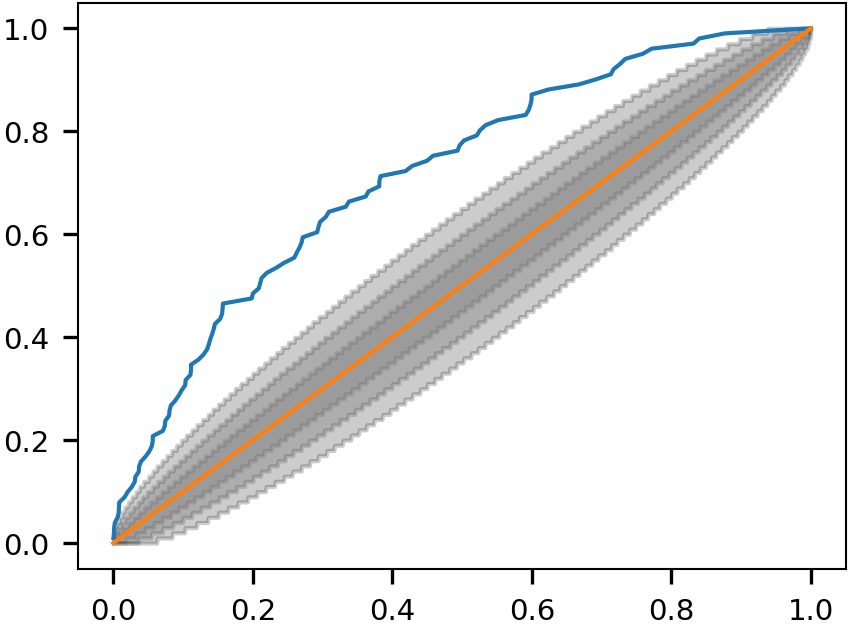

In [200]:
# Check pp-plot
cumul_approximate_dz_0_003=np.append(np.sort(sigs_approximate_dz_0_003),1.0)
plt.plot(cumul_approximate_dz_0_003,(np.array(range(len(cumul_approximate_dz_0_003)))+1.0)/float(len(cumul_approximate_dz_0_003)))
xvals=np.linspace(0,1,1000)
plt.plot(xvals,xvals)

for ci, alpha in zip([0.68, 0.95, 0.997],[0.1,0.15,0.2]):
    edge_of_bound = (1. - ci) / 2.
    lower = scipy.stats.binom.ppf(1 - edge_of_bound, NH0s,xvals) / NH0s
    upper = scipy.stats.binom.ppf(edge_of_bound, NH0s,xvals) / NH0s
    lower[0] = 0
    upper[0] = 0
    plt.fill_between(xvals, lower, upper, alpha=alpha, color='k')
#plt.savefig("OneGalaxy_redshifterrors_approximate_dz_0_003_ppplot.pdf")

In [349]:
# Now repeat with dz/z = 3%.

Ngw=200
sigma_dl=0.05
zcut_rate=1.4
dl_thr=1550
galaxies_list = np.array([0.01])

z_uncert=0.03
zobs=galaxies_list[0]*(1.0+np.random.randn()*z_uncert)

NH0s=100
H0_true_list=20.+120.*np.random.rand(NH0s)
sigs_approximate_dz_0_03=np.zeros(NH0s)
for i in np.arange(NH0s):
    H0_true=H0_true_list[i]
    true_cosmology = FlatLambdaCDM(H0=H0_true,Om0=0.25) # True cosmology

    H0_min=H0_true-10.0
    H0_max=H0_true+10.0
    if (H0_min < 20.):
        H0_min=20.
        H0_max=40.
    if (H0_max > 140.):
        H0_min=120.
        H0_max=140.

    gw_obs_dl,_,_,std_dl=draw_gw_events(Ngw,sigma_dl,dl_thr,galaxies_list,true_cosmology,zcut_rate)
    H0_array=np.linspace(H0_min,H0_max,1000)
    posterior_matrix, combined_approximate_dz_0_03=galaxy_catalog_analysis_onegal_withuncert(H0_array,zobs,z_uncert,gw_obs_dl,sigma_dl,dl_thr)

    arg=np.max(np.where(H0_array<H0_true))
    dH=H0_array[1]-H0_array[0]
    siglow=np.sum(combined_approximate_dz_0_03[:(arg+1)])

    sig=dH*(siglow+combined_approximate_dz_0_03[arg+1]*(H0_true-H0_array[arg])/(H0_array[arg+1]-H0_array[arg]))
    sigsapproximate_dz_0_03[i]=sig
    print(i,sig)



You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9667.44it/s]
Running on GW events: 200it [00:28,  6.94it/s]


0 2.872729227491695e-05
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9678.86it/s]
Running on GW events: 200it [00:27,  7.24it/s]


1 0.00028914060103472607
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9629.64it/s]
Running on GW events: 200it [00:26,  7.48it/s]


2 0.0041775617910865485
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9711.11it/s]
Running on GW events: 200it [00:26,  7.47it/s]


3 0.0003061882925558546
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9933.25it/s]
Running on GW events: 200it [00:26,  7.46it/s]


4 0.0004930528514796344
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 8967.00it/s]
Running on GW events: 200it [00:26,  7.57it/s]


5 0.00032366685160052416
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10277.06it/s]
Running on GW events: 200it [00:26,  7.57it/s]


6 0.00024091704014820168
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10399.03it/s]
Running on GW events: 200it [00:26,  7.62it/s]


7 0.0005983575578590116
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9912.59it/s]
Running on GW events: 200it [00:26,  7.59it/s]


8 0.0007882098861339568
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9410.07it/s]
Running on GW events: 200it [00:26,  7.62it/s]


9 0.0006727455028271627
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10154.15it/s]
Running on GW events: 200it [00:26,  7.62it/s]


10 0.00014098290944180363
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10127.40it/s]
Running on GW events: 200it [00:26,  7.69it/s]


11 0.001109458885645134
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10217.62it/s]
Running on GW events: 200it [00:26,  7.62it/s]


12 0.0003580551806754014
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10263.05it/s]
Running on GW events: 200it [00:26,  7.62it/s]


13 0.0029578256498454508
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10289.21it/s]
Running on GW events: 200it [00:26,  7.60it/s]


14 0.0003832285183686275
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10140.48it/s]
Running on GW events: 200it [00:26,  7.64it/s]


15 0.0013234485625246532
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10269.56it/s]
Running on GW events: 200it [00:26,  7.63it/s]


16 0.0026796904430610525
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10464.62it/s]
Running on GW events: 200it [00:26,  7.64it/s]


17 0.000866291376434737
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10460.16it/s]
Running on GW events: 200it [00:26,  7.65it/s]


18 0.00020321166573833882
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10480.76it/s]
Running on GW events: 200it [00:26,  7.55it/s]


19 0.0021489977482510546
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10414.06it/s]
Running on GW events: 200it [00:26,  7.63it/s]


20 0.001853462617430041
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10165.69it/s]
Running on GW events: 200it [00:26,  7.65it/s]


21 0.00026544062594233744
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10240.95it/s]
Running on GW events: 200it [00:26,  7.63it/s]


22 0.0005905201674642798
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10028.61it/s]
Running on GW events: 200it [00:29,  6.82it/s]


23 5.5773437066467636e-05
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10220.14it/s]
Running on GW events: 200it [00:27,  7.21it/s]


24 0.0006963998867636687
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10221.09it/s]
Running on GW events: 200it [00:26,  7.45it/s]


25 0.0013376750426283286
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10331.13it/s]
Running on GW events: 200it [00:26,  7.52it/s]


26 0.004014564871865697
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10380.76it/s]
Running on GW events: 200it [00:26,  7.45it/s]


27 0.00013717086838854005
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10012.92it/s]
Running on GW events: 200it [00:26,  7.60it/s]


28 0.0006529570853059131
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9701.22it/s]
Running on GW events: 200it [00:26,  7.59it/s]


29 0.0031474093493007757
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10143.64it/s]
Running on GW events: 200it [00:26,  7.49it/s]


30 0.0006004419240872548
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10014.43it/s]
Running on GW events: 200it [00:26,  7.54it/s]


31 0.00010037745416612091
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10158.90it/s]
Running on GW events: 200it [00:26,  7.63it/s]


32 0.0019516286018628041
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10243.50it/s]
Running on GW events: 200it [00:26,  7.67it/s]


33 0.0004603995285713785
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10097.63it/s]
Running on GW events: 200it [00:26,  7.66it/s]


34 0.00033799830041479856
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10139.62it/s]
Running on GW events: 200it [00:25,  7.71it/s]


35 0.007313853480355978
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10103.96it/s]
Running on GW events: 200it [00:25,  7.69it/s]


36 0.0007292468867791634
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10050.96it/s]
Running on GW events: 200it [00:26,  7.63it/s]


37 0.0010059907421617984
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9620.74it/s]
Running on GW events: 200it [00:26,  7.63it/s]


38 0.003503414180577997
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 8948.61it/s]
Running on GW events: 200it [00:27,  7.33it/s]


39 0.0004818577724117191
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10054.81it/s]
Running on GW events: 200it [00:26,  7.47it/s]


40 0.0001958738133151082
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10055.82it/s]
Running on GW events: 200it [00:27,  7.25it/s]


41 0.008524140191757488
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10163.43it/s]
Running on GW events: 200it [00:28,  7.11it/s]


42 0.00021660452942033986
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 8363.10it/s]
Running on GW events: 200it [00:27,  7.26it/s]


43 0.0008850143920395139
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9568.91it/s]
Running on GW events: 200it [00:26,  7.64it/s]


44 7.956300124828112e-05
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10804.72it/s]
Running on GW events: 200it [00:25,  7.72it/s]


45 0.039872875353090864
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10694.16it/s]
Running on GW events: 200it [00:26,  7.63it/s]


46 0.8755226268163012
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10202.91it/s]
Running on GW events: 200it [00:26,  7.59it/s]


47 0.0020532189975678364
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10193.17it/s]
Running on GW events: 200it [00:25,  7.92it/s]


48 1.4602963861422317e-05
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10970.23it/s]
Running on GW events: 200it [00:25,  7.96it/s]


49 0.0007732484653316435
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10949.56it/s]
Running on GW events: 200it [00:25,  7.87it/s]


50 0.009681863880386844
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9883.79it/s]
Running on GW events: 200it [00:25,  7.98it/s]


51 0.0020464360780383874
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10975.37it/s]
Running on GW events: 200it [00:25,  8.00it/s]


52 0.001803000768185097
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 11085.75it/s]
Running on GW events: 200it [00:25,  7.93it/s]


53 0.0009477496561087881
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 11103.33it/s]
Running on GW events: 200it [00:25,  7.97it/s]


54 0.00019024400674820378
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10669.16it/s]
Running on GW events: 200it [00:25,  7.88it/s]


55 0.00019367913579411812
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10977.90it/s]
Running on GW events: 200it [00:25,  7.92it/s]


56 0.0004581788688180026
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10878.53it/s]
Running on GW events: 200it [00:25,  7.95it/s]


57 0.0003502032771384802
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10791.68it/s]
Running on GW events: 200it [00:24,  8.04it/s]


58 0.0013437166644767586
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10985.75it/s]
Running on GW events: 200it [00:25,  7.95it/s]


59 0.004425954325156931
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10990.47it/s]
Running on GW events: 200it [00:25,  7.93it/s]


60 0.0003899847774119724
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10691.55it/s]
Running on GW events: 200it [00:25,  7.96it/s]


61 0.00042398939496382645
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10821.47it/s]
Running on GW events: 200it [00:25,  7.93it/s]


62 5.1261452043294685e-05
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10820.05it/s]
Running on GW events: 200it [00:25,  7.91it/s]


63 0.00015317046130073435
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10874.41it/s]
Running on GW events: 200it [00:25,  7.91it/s]


64 0.007568133759693869
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10900.69it/s]
Running on GW events: 200it [00:25,  7.90it/s]


65 0.003728306206384176
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10823.34it/s]
Running on GW events: 200it [00:25,  7.91it/s]


66 0.0020580349247378343
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10991.65it/s]
Running on GW events: 200it [00:25,  7.92it/s]


67 0.00012053917650124024
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10910.00it/s]
Running on GW events: 200it [00:25,  7.89it/s]


68 0.00057049767148114
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10982.35it/s]
Running on GW events: 200it [00:25,  7.94it/s]


69 8.313801945445854e-05
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10849.15it/s]
Running on GW events: 200it [00:25,  7.90it/s]


70 0.0005106742213262445
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10356.69it/s]
Running on GW events: 200it [00:25,  7.89it/s]


71 0.0007998590199909856
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 11122.88it/s]
Running on GW events: 200it [00:25,  7.87it/s]


72 0.0010740359965596925
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10985.86it/s]
Running on GW events: 200it [00:25,  7.93it/s]


73 0.0007947436719162959
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10932.92it/s]
Running on GW events: 200it [00:25,  7.96it/s]


74 2.3444921935726317e-05
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10817.73it/s]
Running on GW events: 200it [00:25,  7.93it/s]


75 0.004047649718864532
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10694.27it/s]
Running on GW events: 200it [00:25,  7.88it/s]


76 0.05149885735915871
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10966.96it/s]
Running on GW events: 200it [00:25,  7.99it/s]


77 0.0012074174075995842
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 11088.71it/s]
Running on GW events: 200it [00:24,  8.01it/s]


78 0.002963899188172875
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10847.13it/s]
Running on GW events: 200it [00:25,  7.97it/s]


79 0.00218288196734814
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10762.05it/s]
Running on GW events: 200it [00:25,  7.95it/s]


80 0.0019769678164686575
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10810.23it/s]
Running on GW events: 200it [00:25,  7.90it/s]


81 0.0005074109642224634
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10265.16it/s]
Running on GW events: 200it [00:25,  7.91it/s]


82 0.0008470724779369511
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 11048.87it/s]
Running on GW events: 200it [00:24,  8.00it/s]


83 0.0015723633728398918
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 11165.07it/s]
Running on GW events: 200it [00:25,  7.89it/s]


84 0.00257592770896336
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10936.22it/s]
Running on GW events: 200it [00:25,  7.90it/s]


85 8.673407185489386e-05
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 11163.47it/s]
Running on GW events: 200it [00:25,  7.96it/s]


86 2.779578669252921e-05
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10752.70it/s]
Running on GW events: 200it [00:25,  7.89it/s]


87 0.00010478294408606008
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10850.36it/s]
Running on GW events: 200it [00:25,  7.85it/s]


88 0.0004187837103368404
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 11115.07it/s]
Running on GW events: 200it [00:25,  7.96it/s]


89 0.0031403647075184476
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10883.89it/s]
Running on GW events: 200it [00:25,  7.95it/s]


90 0.0008382016084206307
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10980.11it/s]
Running on GW events: 200it [00:25,  7.93it/s]


91 0.012224551294805106
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 11237.73it/s]
Running on GW events: 200it [00:25,  7.92it/s]


92 0.0015636599082015585
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10864.50it/s]
Running on GW events: 200it [00:25,  7.97it/s]


93 4.008213510608683e-05
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 11039.85it/s]
Running on GW events: 200it [00:25,  7.96it/s]


94 0.0030044002361931115
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10996.98it/s]
Running on GW events: 200it [00:25,  7.91it/s]


95 0.004314161692513619
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10886.24it/s]
Running on GW events: 200it [00:25,  7.93it/s]


96 0.004409854612802102
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10928.47it/s]
Running on GW events: 200it [00:25,  7.96it/s]


97 0.0012944363439911437
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10963.09it/s]
Running on GW events: 200it [00:25,  7.92it/s]


98 0.000766245584423032
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 11097.57it/s]
Running on GW events: 200it [00:25,  7.94it/s]

99 0.00021476629499478188


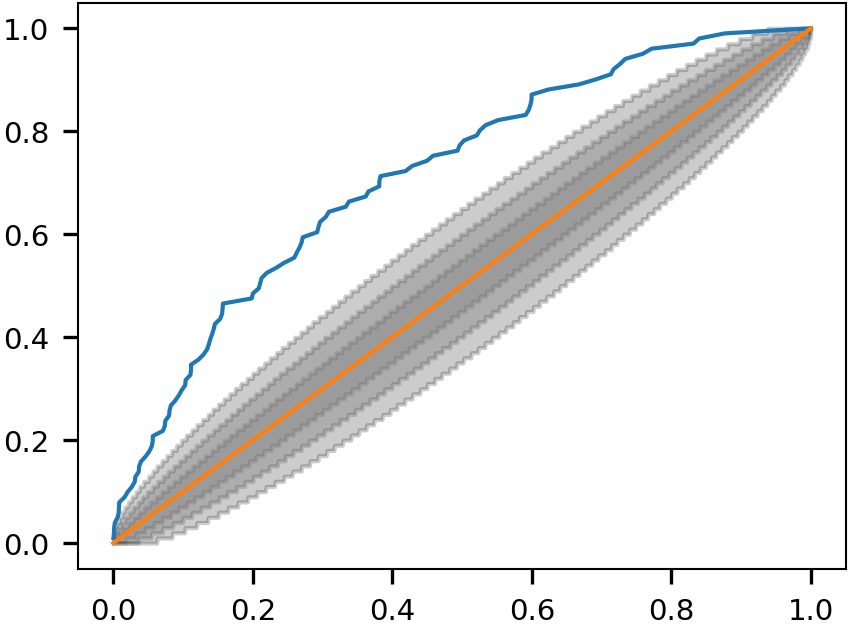

In [200]:
# Check pp-plot

cumul_approximate_dz_0_03=np.append(np.sort(sigs_approximate_dz_0_03),1.0)
plt.plot(cumul_approximate_dz_0_03,(np.array(range(len(cumul_approximate_dz_0_03)))+1.0)/float(len(cumul_approximate_dz_0_03)))
xvals=np.linspace(0,1,1000)
plt.plot(xvals,xvals)

for ci, alpha in zip([0.68, 0.95, 0.997],[0.1,0.15,0.2]):
    edge_of_bound = (1. - ci) / 2.
    lower = scipy.stats.binom.ppf(1 - edge_of_bound, NH0s,xvals) / NH0s
    upper = scipy.stats.binom.ppf(edge_of_bound, NH0s,xvals) / NH0s
    lower[0] = 0
    upper[0] = 0
    plt.fill_between(xvals, lower, upper, alpha=alpha, color='k')
#plt.savefig("OneGalaxy_redshifterrors_approximate_dz_0_03_ppplot.pdf")

### One galaxy, with redshift errors, full likelihood

In [206]:
# We now repeat the analysis using the full likelihood, that mareginalises over the
# unknown galaxy redshift after combining the GW events.
#
# First set dz/z = 0.3%

Ngw=200
sigma_dl=0.05
zcut_rate=1.4
dl_thr=1550
galaxies_list = np.array([0.01])

z_uncert=0.003

NH0s=100
H0_true_list=20.+120.*np.random.rand(NH0s)
sigs_full_dz_0_003=np.zeros(NH0s)
for i in np.arange(NH0s):
    true_cosmology = FlatLambdaCDM(H0=H0_true,Om0=0.25) # True cosmology

    H0_min=H0_true-10.0
    H0_max=H0_true+10.0
    if (H0_min < 20.):
        H0_min=20.
        H0_max=40.
    if (H0_max > 140.):
        H0_min=120.
        H0_max=140.

    gw_obs_dl,_,_,std_dl=draw_gw_events(Ngw,sigma_dl,dl_thr,galaxies_list,true_cosmology,zcut_rate)
    H0_array=np.linspace(H0_min,H0_max,1000)

    # Draw observed galaxy redshift
    zobs=galaxies_list[0]*(1.0+np.random.randn()*z_uncert)

    combined_full_dz_0_003=galaxy_catalog_analysis_onegal_withuncert_full(H0_array,zobs,z_uncert,gw_obs_dl,sigma_dl,dl_thr,0)

    arg=np.max(np.where(H0_array<H0_true))
    dH=H0_array[1]-H0_array[0]
    siglow=np.sum(combined_full_dz_0_003[:(arg+1)])

    sig=dH*(siglow+combined_full_dz_0_003[arg+1]*(H0_true-H0_array[arg])/(H0_array[arg+1]-H0_array[arg]))

    sigs_full_dz_0_003[i]=sig
    print(i,sig)



You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9668.75it/s]


0 0.7026967929120898
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9216.83it/s]


1 0.22459964881096176
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9079.92it/s]


2 0.9000591729350407
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9514.04it/s]


3 0.34738407478246436
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9368.81it/s]


4 0.8923092389638231
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9434.31it/s]


5 0.5978178069637938
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9387.03it/s]


6 0.7798893412733832
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9043.74it/s]


7 0.9409720638757322
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9580.98it/s]


8 0.1896818245557679
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9584.79it/s]


9 0.019263934070866275
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9604.21it/s]


10 0.673551973904985
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 8031.22it/s]


11 0.8776598020841251
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9335.59it/s]


12 0.7918962437385566
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9407.14it/s]


13 0.6633843971213369
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 8985.28it/s]


14 0.6667122329066248
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9512.66it/s]


15 0.8370922347770803
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9068.26it/s]


16 0.9683636341085508
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9296.77it/s]


17 0.08962727808862982
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9382.89it/s]


18 0.8247915095640128
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9247.40it/s]


19 0.3126131953713315
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 8850.01it/s]


20 0.27299255732423416
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9811.90it/s]


21 0.4349268543900553
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9240.55it/s]


22 0.8954210278959202
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9148.62it/s]


23 0.21485032649744715
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9130.78it/s]


24 0.7768574336199386
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9318.27it/s]


25 0.2775785777027644
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9673.43it/s]


26 0.2674887811951523
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10020.44it/s]


27 0.8683091310049735
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10007.91it/s]


28 0.25224526010832604
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9522.79it/s]


29 0.5382552724082215
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9601.00it/s]


30 0.5928104747926646
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9997.51it/s]


31 0.07894570042571557
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9870.30it/s]


32 0.8365014297384636
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9363.04it/s]


33 0.02791397239491767
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9711.08it/s]


34 0.3409069028555047
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9974.59it/s]


35 0.43037328586425927
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9683.44it/s]


36 0.5477200850386298
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9566.27it/s]


37 0.5838039226683498
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9750.95it/s]


38 0.466512101177416
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10227.91it/s]


39 0.9567472304478944
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9798.81it/s]


40 0.41702630250759204
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9844.35it/s]


41 0.9291503078517087
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9928.40it/s]


42 0.31153510299101017
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9836.13it/s]


43 0.43279216755250105
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10065.72it/s]


44 0.9928067587961399
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9435.92it/s]


45 0.9744726890517253
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9705.35it/s]


46 0.39401782921459044
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9682.70it/s]


47 0.29704292791447906
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9641.81it/s]


48 0.837024356969544
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9711.37it/s]


49 0.12759387090863114
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9748.57it/s]


50 0.1996814270682562
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9444.76it/s]


51 0.02708517595212446
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10007.53it/s]


52 0.027267736154160473
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9494.79it/s]


53 0.6072999811074297
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9675.40it/s]


54 0.850445591989418
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9695.73it/s]


55 0.5389397511771178
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10006.90it/s]


56 0.3730140698854136
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10062.07it/s]


57 0.04063626956094975
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9622.72it/s]


58 0.9085908184998716
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9677.36it/s]


59 0.6978127872442661
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9904.23it/s]


60 0.6119284930864517
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9891.81it/s]


61 0.29267227694291487
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10086.15it/s]


62 0.16214642575256147
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9609.01it/s]


63 0.08342854781889525
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9987.94it/s]


64 0.36314599069213527
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9707.78it/s]


65 0.0808258754387684
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10011.61it/s]


66 0.2989644795034434
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9510.42it/s]


67 0.436870475540293
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10056.04it/s]


68 0.8248313880911666
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9516.12it/s]


69 0.2993781199654139
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9394.52it/s]


70 0.9195314606373615
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10151.77it/s]


71 0.9390135008398824
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9675.84it/s]


72 0.11862709855225007
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10271.90it/s]


73 0.9803413711375183
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10032.11it/s]


74 0.2912498746902269
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9420.89it/s]


75 0.1287375083778409
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9974.18it/s]


76 0.8597202570537227
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9728.09it/s]


77 0.030669413735298027
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10220.89it/s]


78 0.21464994738384566
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9991.29it/s]


79 0.8006153577086815
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10036.62it/s]


80 0.2771789169708673
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10087.75it/s]


81 0.09862635115772246
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9484.35it/s]


82 0.500239401756646
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 8355.77it/s]


83 0.974228329744496
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9485.77it/s]


84 0.7882296338101911
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9523.63it/s]


85 0.3280182791983833
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10443.62it/s]


86 0.6965885017675133
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9228.23it/s]


87 0.7367015953121338
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9697.25it/s]


88 0.7523937843111528
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9486.11it/s]


89 0.48047121803227566
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9415.39it/s]


90 0.46410140681601236
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9504.00it/s]


91 0.1907449630271176
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9103.41it/s]


92 0.12011999352984754
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9417.72it/s]


93 0.07644298995559819
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9667.26it/s]


94 0.41721383604014556
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9622.77it/s]


95 0.5958315686954584
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9978.46it/s]


96 0.23414518880116877
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10193.66it/s]


97 0.17701538438057035
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9564.33it/s]


98 0.7582941454592999
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10009.41it/s]


99 0.5442789896743612


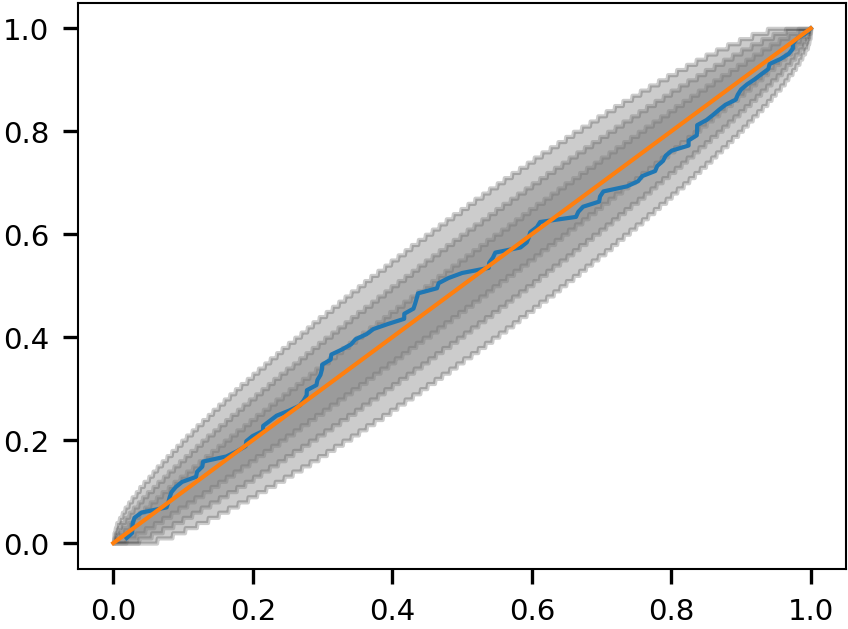

In [207]:
# Check pp-plot
cumul_full_dz_0_003=np.append(np.sort(sigs_full_dz_0_003),1.0)
plt.plot(cumul_full_dz_0_003,(np.array(range(len(cumul_full_dz_0_003)))+1.0)/float(len(cumul_full_dz_0_003)))
xvals=np.linspace(0,1,1000)
plt.plot(xvals,xvals)

for ci, alpha in zip([0.68, 0.95, 0.997],[0.1,0.15,0.2]):
    edge_of_bound = (1. - ci) / 2.
    lower = scipy.stats.binom.ppf(1 - edge_of_bound, NH0s,xvals) / NH0s
    upper = scipy.stats.binom.ppf(edge_of_bound, NH0s,xvals) / NH0s
    lower[0] = 0
    upper[0] = 0
    plt.fill_between(xvals, lower, upper, alpha=alpha, color='k')
#plt.savefig("OneGalaxy_redshifterrors_full_dz_0_003_ppplot.pdf")


In [206]:
# Now set dz/z = 3%

Ngw=200
sigma_dl=0.05
zcut_rate=1.4
dl_thr=1550
galaxies_list = np.array([0.01])

z_uncert=0.03

NH0s=100
H0_true_list=20.+120.*np.random.rand(NH0s)
sigs_full_dz_0_03=np.zeros(NH0s)
for i in np.arange(NH0s):
    true_cosmology = FlatLambdaCDM(H0=H0_true,Om0=0.25) # True cosmology

    H0_min=H0_true-10.0
    H0_max=H0_true+10.0
    if (H0_min < 20.):
        H0_min=20.
        H0_max=40.
    if (H0_max > 140.):
        H0_min=120.
        H0_max=140.

    gw_obs_dl,_,_,std_dl=draw_gw_events(Ngw,sigma_dl,dl_thr,galaxies_list,true_cosmology,zcut_rate)
    H0_array=np.linspace(H0_min,H0_max,1000)

    # Draw observed galaxy redshift
    zobs=galaxies_list[0]*(1.0+np.random.randn()*z_uncert)

    combined_full_dz_0_03=galaxy_catalog_analysis_onegal_withuncert_full(H0_array,zobs,z_uncert,gw_obs_dl,sigma_dl,dl_thr,0)

    arg=np.max(np.where(H0_array<H0_true))
    dH=H0_array[1]-H0_array[0]
    siglow=np.sum(combined_full_dz_0_03[:(arg+1)])

    sig=dH*(siglow+combined_full_dz_0_03[arg+1]*(H0_true-H0_array[arg])/(H0_array[arg+1]-H0_array[arg]))

    sigs_full_dz_0_03[i]=sig
    print(i,sig)



You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9668.75it/s]


0 0.7026967929120898
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9216.83it/s]


1 0.22459964881096176
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9079.92it/s]


2 0.9000591729350407
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9514.04it/s]


3 0.34738407478246436
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9368.81it/s]


4 0.8923092389638231
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9434.31it/s]


5 0.5978178069637938
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9387.03it/s]


6 0.7798893412733832
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9043.74it/s]


7 0.9409720638757322
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9580.98it/s]


8 0.1896818245557679
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9584.79it/s]


9 0.019263934070866275
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9604.21it/s]


10 0.673551973904985
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 8031.22it/s]


11 0.8776598020841251
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9335.59it/s]


12 0.7918962437385566
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9407.14it/s]


13 0.6633843971213369
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 8985.28it/s]


14 0.6667122329066248
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9512.66it/s]


15 0.8370922347770803
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9068.26it/s]


16 0.9683636341085508
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9296.77it/s]


17 0.08962727808862982
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9382.89it/s]


18 0.8247915095640128
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9247.40it/s]


19 0.3126131953713315
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 8850.01it/s]


20 0.27299255732423416
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9811.90it/s]


21 0.4349268543900553
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9240.55it/s]


22 0.8954210278959202
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9148.62it/s]


23 0.21485032649744715
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9130.78it/s]


24 0.7768574336199386
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9318.27it/s]


25 0.2775785777027644
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9673.43it/s]


26 0.2674887811951523
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10020.44it/s]


27 0.8683091310049735
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10007.91it/s]


28 0.25224526010832604
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9522.79it/s]


29 0.5382552724082215
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9601.00it/s]


30 0.5928104747926646
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9997.51it/s]


31 0.07894570042571557
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9870.30it/s]


32 0.8365014297384636
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9363.04it/s]


33 0.02791397239491767
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9711.08it/s]


34 0.3409069028555047
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9974.59it/s]


35 0.43037328586425927
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9683.44it/s]


36 0.5477200850386298
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9566.27it/s]


37 0.5838039226683498
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9750.95it/s]


38 0.466512101177416
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10227.91it/s]


39 0.9567472304478944
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9798.81it/s]


40 0.41702630250759204
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9844.35it/s]


41 0.9291503078517087
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9928.40it/s]


42 0.31153510299101017
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9836.13it/s]


43 0.43279216755250105
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10065.72it/s]


44 0.9928067587961399
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9435.92it/s]


45 0.9744726890517253
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9705.35it/s]


46 0.39401782921459044
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9682.70it/s]


47 0.29704292791447906
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9641.81it/s]


48 0.837024356969544
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9711.37it/s]


49 0.12759387090863114
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9748.57it/s]


50 0.1996814270682562
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9444.76it/s]


51 0.02708517595212446
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10007.53it/s]


52 0.027267736154160473
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9494.79it/s]


53 0.6072999811074297
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9675.40it/s]


54 0.850445591989418
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9695.73it/s]


55 0.5389397511771178
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10006.90it/s]


56 0.3730140698854136
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10062.07it/s]


57 0.04063626956094975
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9622.72it/s]


58 0.9085908184998716
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9677.36it/s]


59 0.6978127872442661
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9904.23it/s]


60 0.6119284930864517
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9891.81it/s]


61 0.29267227694291487
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10086.15it/s]


62 0.16214642575256147
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9609.01it/s]


63 0.08342854781889525
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9987.94it/s]


64 0.36314599069213527
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9707.78it/s]


65 0.0808258754387684
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10011.61it/s]


66 0.2989644795034434
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9510.42it/s]


67 0.436870475540293
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10056.04it/s]


68 0.8248313880911666
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9516.12it/s]


69 0.2993781199654139
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9394.52it/s]


70 0.9195314606373615
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10151.77it/s]


71 0.9390135008398824
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9675.84it/s]


72 0.11862709855225007
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10271.90it/s]


73 0.9803413711375183
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10032.11it/s]


74 0.2912498746902269
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9420.89it/s]


75 0.1287375083778409
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9974.18it/s]


76 0.8597202570537227
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9728.09it/s]


77 0.030669413735298027
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10220.89it/s]


78 0.21464994738384566
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9991.29it/s]


79 0.8006153577086815
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10036.62it/s]


80 0.2771789169708673
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10087.75it/s]


81 0.09862635115772246
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9484.35it/s]


82 0.500239401756646
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 8355.77it/s]


83 0.974228329744496
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9485.77it/s]


84 0.7882296338101911
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9523.63it/s]


85 0.3280182791983833
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10443.62it/s]


86 0.6965885017675133
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9228.23it/s]


87 0.7367015953121338
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9697.25it/s]


88 0.7523937843111528
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9486.11it/s]


89 0.48047121803227566
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9415.39it/s]


90 0.46410140681601236
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9504.00it/s]


91 0.1907449630271176
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9103.41it/s]


92 0.12011999352984754
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9417.72it/s]


93 0.07644298995559819
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9667.26it/s]


94 0.41721383604014556
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9622.77it/s]


95 0.5958315686954584
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9978.46it/s]


96 0.23414518880116877
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10193.66it/s]


97 0.17701538438057035
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9564.33it/s]


98 0.7582941454592999
You detected 100000 binaries out of 100000 simulated


1000it [00:00, 10009.41it/s]


99 0.5442789896743612


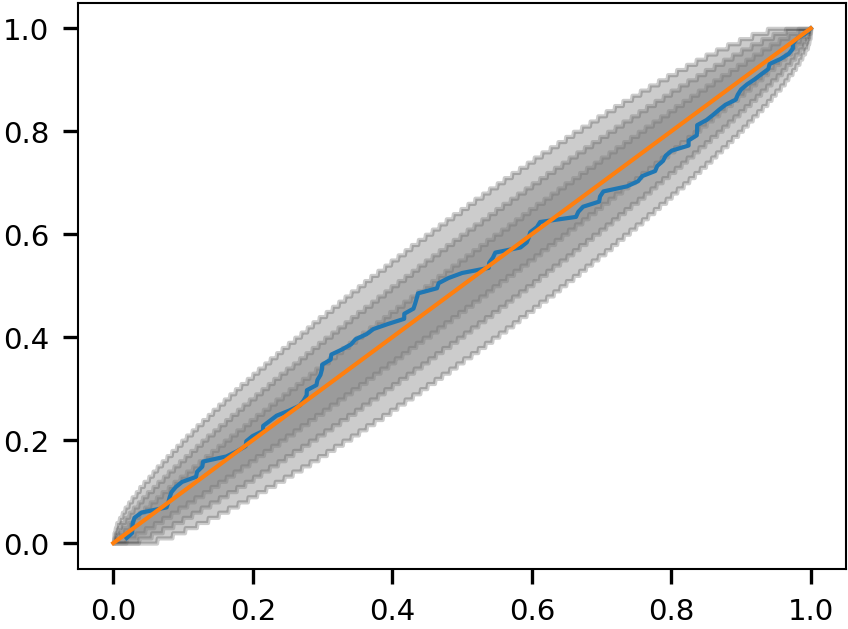

In [207]:
# Check pp-plot
cumul_full_dz_0_03=np.append(np.sort(sigs_full_dz_0_03),1.0)
plt.plot(cumul_full_dz_0_03,(np.array(range(len(cumul_full_dz_0_03)))+1.0)/float(len(cumul_full_dz_0_03)))
xvals=np.linspace(0,1,1000)
plt.plot(xvals,xvals)

for ci, alpha in zip([0.68, 0.95, 0.997],[0.1,0.15,0.2]):
    edge_of_bound = (1. - ci) / 2.
    lower = scipy.stats.binom.ppf(1 - edge_of_bound, NH0s,xvals) / NH0s
    upper = scipy.stats.binom.ppf(edge_of_bound, NH0s,xvals) / NH0s
    lower[0] = 0
    upper[0] = 0
    plt.fill_between(xvals, lower, upper, alpha=alpha, color='k')
#plt.savefig("OneGalaxy_redshifterrors_full_dz_0_003_ppplot.pdf")


### One galaxy, no redshift errors

In [1]:
# To finish this study, we now consider the case where redshifts are measured
# perfectly. 

In [5]:
Ngw=200
sigma_dl=0.05
zcut_rate=1.4
dl_thr=1550
galaxies_list = np.array([0.01])

NH0s=100
H0_true_list=20.+120.*np.random.rand(NH0s)
sigs=np.zeros(NH0s)
for i in np.arange(NH0s):
    H0_true=H0_true_list[i]
    true_cosmology = FlatLambdaCDM(H0=H0_true,Om0=0.25) # True cosmology
    H0_min=H0_true-3.0
    H0_max=H0_true+3.0
    if (H0_min < 20.):
        H0_min=20.
        H0_max=25.
    if (H0_max > 140.):
        H0_min=135.
        H0_max=140.

    gw_obs_dl,_,_,std_dl=draw_gw_events(Ngw,sigma_dl,dl_thr,galaxies_list,true_cosmology,zcut_rate)
    H0_array_perfz=np.linspace(H0_min,H0_max,1000)
    posterior_matrix_perfz, combined_perfz=galaxy_catalog_analysis_accurate_redshift(H0_array_perfz,galaxies_list,zcut_rate,gw_obs_dl,sigma_dl,dl_thr)

    arg=np.max(np.where(H0_array_perfz<H0_true))
    dH=H0_array_perfz[1]-H0_array_perfz[0]
    siglow=np.sum(combined_perfz[:(arg+1)])

    sig=dH*(siglow+combined_perfz[arg+1]*(H0_true-H0_array_perfz[arg])/(H0_array_perfz[arg+1]-H0_array_perfz[arg]))
    sigs_perfz[i]=sig
    print(i,sig)



You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 390.99it/s]


0 0.4935937030276228
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 391.20it/s]


1 0.6427560896201913
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 388.85it/s]


2 0.33135049341229117
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 396.33it/s]


3 0.4419538003801655
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 394.70it/s]


4 0.41861535025401386
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 393.23it/s]


5 0.7131104566056532
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 389.80it/s]


6 0.07489417754464323
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 381.24it/s]


7 0.7603669797121991
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 366.49it/s]


8 0.5306563044344865
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 355.42it/s]


9 0.6388408440354055
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 377.20it/s]


10 0.18612229239272837
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 380.68it/s]


11 0.2605932715791419
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 359.65it/s]


12 0.32103502240133425
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 370.94it/s]


13 0.6943999071301074
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 378.41it/s]


14 0.24294490493204435
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 372.49it/s]


15 0.4787807716147546
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 379.19it/s]


16 0.7513331457577398
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 370.60it/s]


17 0.7444631447801201
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 380.70it/s]


18 0.786478020222668
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 366.36it/s]


19 0.07733463550720888
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 383.89it/s]


20 0.36831514467331794
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 384.03it/s]


21 0.6339431097420233
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 337.83it/s]


22 0.93607531827067
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 378.96it/s]


23 0.6706051141059491
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 382.92it/s]


24 0.9758754765978077
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 341.25it/s]


25 0.8458480193847069
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 355.05it/s]


26 0.5450729211406362
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 337.51it/s]


27 0.8137269488361563
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 377.18it/s]


28 0.1850311873767093
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 392.22it/s]


29 0.45895201403685465
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 393.62it/s]


30 0.3611399732679415
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 378.18it/s]


31 0.0357015530347784
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 381.65it/s]


32 0.977221830121622
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 370.27it/s]


33 0.8801152702357585
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 368.70it/s]


34 0.8140301583052307
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 377.12it/s]


35 0.05227015211425859
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 392.26it/s]


36 0.08513822723707683
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 388.71it/s]


37 0.623088540946769
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 384.62it/s]


38 0.7127089510251081
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 377.21it/s]


39 0.5290258705581892
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 383.57it/s]


40 0.0785398677448955
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 381.04it/s]


41 0.9655160830967625
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 377.19it/s]


42 0.018254519910882446
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 387.81it/s]


43 0.52188525063878
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 355.05it/s]


44 0.987631953601553
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 369.85it/s]


45 0.718220491243587
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 372.18it/s]


46 0.9613433011572337
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 349.70it/s]


47 0.9766315294030504
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 356.90it/s]


48 0.4607328458886772
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 337.13it/s]


49 0.9781452108810106
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 339.23it/s]


50 0.8698807407173864
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 390.20it/s]


51 0.6969720222918256
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 363.59it/s]


52 0.7930827337592044
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 380.83it/s]


53 0.7187158031533594
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 379.60it/s]


54 0.8684382030982775
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 361.61it/s]


55 0.22043482636168604
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 379.07it/s]


56 0.08571694641984823
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 383.62it/s]


57 0.4315921960966257
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 382.04it/s]


58 0.8793611803110786
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 375.35it/s]


59 0.8085753093189055
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 384.05it/s]


60 0.03954685647415945
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 365.24it/s]


61 0.6025461654840825
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 386.34it/s]


62 0.21897874170987533
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 385.93it/s]


63 0.6733900096355315
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 390.29it/s]


64 0.6102113902244379
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 385.06it/s]


65 0.31856729501600617
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 389.89it/s]


66 0.04730883232642688
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 385.50it/s]


67 0.2542688638820029
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 385.82it/s]


68 0.21609140309260652
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 383.11it/s]


69 0.8250852463032274
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 384.57it/s]


70 0.2046511688792717
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 378.99it/s]


71 0.5970189029479017
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 385.73it/s]


72 0.48226702558634865
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 391.43it/s]


73 0.5955123263006683
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 360.86it/s]


74 0.5604138324486267
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 378.80it/s]


75 0.18169005996605278
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 381.66it/s]


76 0.09103017814441114
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 358.95it/s]


77 0.1307653535301313
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 363.98it/s]


78 0.22957698351062292
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 383.08it/s]


79 0.2003253147380522
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 366.44it/s]


80 0.2693294875686463
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 377.88it/s]


81 0.8869246336722056
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 378.89it/s]


82 0.3345240865540144
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 366.32it/s]


83 0.6954398957294472
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 362.62it/s]


84 0.9641369952080026
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 348.52it/s]


85 0.12719661872163368
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 359.52it/s]


86 0.9613112597120232
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 365.50it/s]


87 0.27317874712753626
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 362.85it/s]


88 0.8115681296780676
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 373.83it/s]


89 0.7846973765459393
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 334.83it/s]


90 0.370935493439708
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 343.54it/s]


91 0.7655734573724448
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:03, 314.11it/s]


92 0.3400282668012262
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:03, 324.59it/s]


93 0.2398107978394785
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 392.05it/s]


94 0.6577808858259291
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 383.20it/s]


95 0.23534985805164177
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 381.94it/s]


96 0.3472179630432196
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 340.20it/s]


97 0.7656844138389697
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 372.18it/s]


98 0.03068229398726785
You detected 200 binaries out of 100000 simulated


running on H0: 1000it [00:02, 393.97it/s]

99 0.9301881386443973


In [7]:
# Check pp-plot.

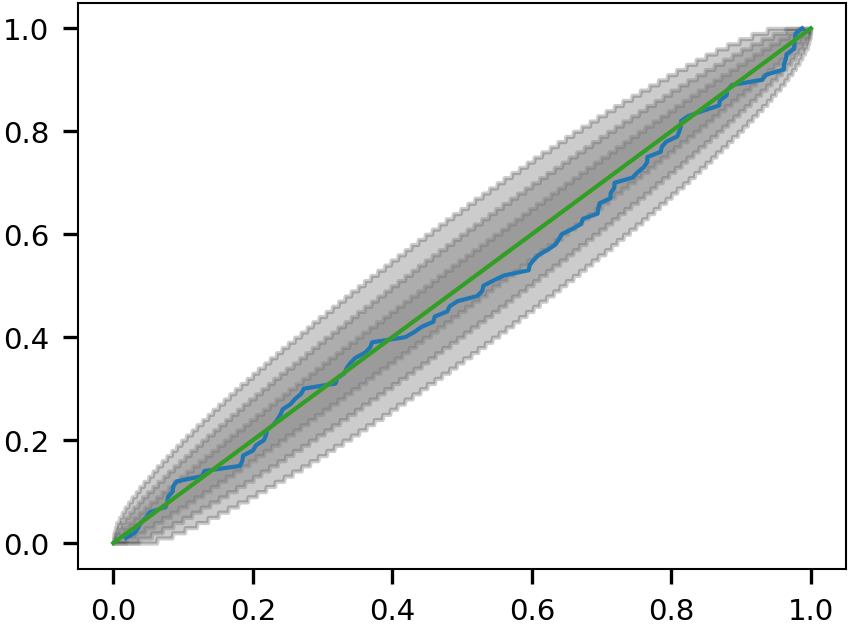

In [8]:
cumul_perfz=np.sort(sigs_perfz)
plt.plot(cumul_perfz,(np.array(range(len(cumul_perfz)))+1.0)/float(len(cumul_perfz)))
plt.plot(cumul_perfz,cumul_perfz)
xvals=np.linspace(0,1,1000)
plt.plot(xvals,xvals)

for ci, alpha in zip([0.68, 0.95, 0.997],[0.1,0.15,0.2]):
    edge_of_bound = (1. - ci) / 2.
    lower = scipy.stats.binom.ppf(1 - edge_of_bound, NH0s,xvals) / NH0s
    upper = scipy.stats.binom.ppf(edge_of_bound, NH0s,xvals) / NH0s
    lower[0] = 0
    upper[0] = 0
    plt.fill_between(xvals, lower, upper, alpha=alpha, color='k')

#plt.savefig("OneGalaxy_perfectredshift_ppplot.pdf")

In [ ]:
# In this limit we can also compute the pp-plot analytically, for arbitrarily 
# large numbers of H0s.

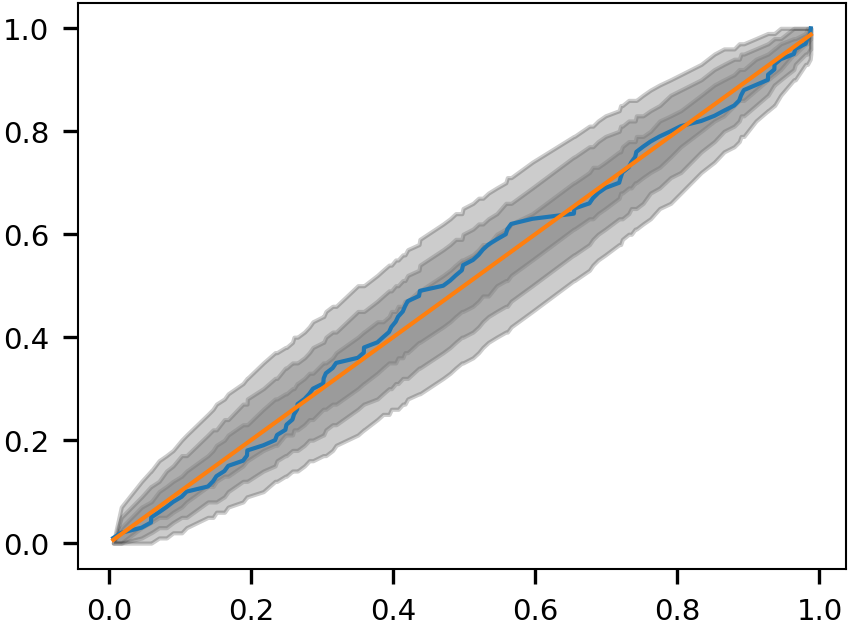

In [260]:
H0_true=70.

NH0s=100
H0_true_list=20.+120.*np.random.rand(NH0s)
sigs=np.zeros(NH0s)
for i in np.arange(NH0s):
    H0_min=H0_true-3.0
    H0_max=H0_true+3.0
    if (H0_min < 20.):
        H0_min=20.
        H0_max=23.
    if (H0_max > 140.):
        H0_min=137.
        H0_max=140.


    true_cosmology = FlatLambdaCDM(H0=H0_true,Om0=0.25) # True cosmology

    dl_true=true_cosmology.luminosity_distance(galaxies_list[0]).to('Mpc').value
    gw_obs_dl=dl_true*(1.0+sigma_dl*np.random.normal(0.,1.,Ngw))
    invvar=np.sum(gw_obs_dl*gw_obs_dl)/((sigma_dl*dl_true*H0_true)**2)
    mu=np.sum(gw_obs_dl/(sigma_dl*sigma_dl*dl_true*H0_true))/invvar
    H0_array=np.linspace(H0_min,H0_max,10000)
    post=(np.exp(Ngw*np.log(H0_array)-0.5*invvar*((H0_array-mu)**2)-np.max(Ngw*np.log(H0_array)-0.5*invvar*((H0_array-mu)**2))))
    dH=H0_array[1]-H0_array[0]
    post_norm=np.sum(post)*dH
    post/=post_norm
    arg=np.max(np.where(H0_array<H0_true))
    siglow=np.sum(post[:(arg+1)])
    sig=dH*(siglow+post[arg+1]*(H0_true-H0_array[arg])/(H0_array[arg+1]-H0_array[arg]))
    sigs[i]=sig

cumul_anal=np.sort(sigs)
plt.plot(cumul_anal,(np.array(range(len(cumul_anal)))+1.0)/float(len(cumul_anal)))
plt.plot(cumul_anal,cumul_anal)

for ci, alpha in zip([0.68, 0.95, 0.997],[0.1,0.15,0.2]):
    edge_of_bound = (1. - ci) / 2.
    lower = scipy.stats.binom.ppf(1 - edge_of_bound, NH0s,cumul_anal) / NH0s
    upper = scipy.stats.binom.ppf(edge_of_bound, NH0s,cumul_anal) / NH0s
    lower[0] = 0
    upper[0] = 0
    plt.fill_between(cumul_anal, lower, upper, alpha=alpha, color='k')
#plt.savefig("OneGalaxy_perfectredshift_ppplot_analytic.pdf")

### Make figures for paper

In [ ]:
# First we make what is Figure 8 in the paper, which compares posteriors
# generated using the full and approximate likelihood, for different choices
# of the fractionnal redshift error, including zero.
#
# To do this we rerun the code once for each scenario, with H0 set to the 
# value of 70 km/s/Mpc.

In [234]:
H0_true=70.0
true_cosmology = FlatLambdaCDM(H0=H0_true,Om0=0.25) # True cosmology

H0_min=H0_true-10.0
H0_max=H0_true+10.0

gw_obs_dl,_,_,std_dl=draw_gw_events(Ngw,sigma_dl,dl_thr,galaxies_list,true_cosmology,zcut_rate)
H0_array=np.linspace(H0_min,H0_max,1000)

z_uncert=0.03
zobs=galaxies_list[0]*(1.0+np.random.randn()*z_uncert)
combined_full_dz_0_03=galaxy_catalog_analysis_onegal_withuncert_full(H0_array,zobs,z_uncert,gw_obs_dl,sigma_dl,dl_thr,0)
posterior_matrix, combined_approximate_dz_0_03=galaxy_catalog_analysis_onegal_withuncert(H0_array,zobs,z_uncert,gw_obs_dl,sigma_dl,dl_thr)

z_uncert=0.003
zobs=galaxies_list[0]*(1.0+np.random.randn()*z_uncert)
posterior_matrix, combined_approximate_dz_0_003=galaxy_catalog_analysis_onegal_withuncert(H0_array,zobs,z_uncert,gw_obs_dl,sigma_dl,dl_thr)

H0_min=H0_true-5.0
H0_max=H0_true+5.0
H0_array_full_dz_0_003=np.linspace(H0_min,H0_max,1000)
combined_full_dz_0_003=galaxy_catalog_analysis_onegal_withuncert_full(H0_array_full_dz_0_003,zobs,z_uncert,gw_obs_dl,sigma_dl,dl_thr,0)

# For simplicity for the perfect redshift case we take the fractional error 
# to be very small, but finite.
z_uncert=0.000001
zobs=galaxies_list[0]*(1.0+np.random.randn()*z_uncert)

H0_min=H0_true-5.0
H0_max=H0_true+5.0
H0_array_perfz=np.linspace(H0_min,H0_max,1000)
combined_perfz=galaxy_catalog_analysis_onegal_withuncert_full(H0_array_full_perfz,zobs,z_uncert,gw_obs_dl,sigma_dl,dl_thr,0)


You detected 100000 binaries out of 100000 simulated


1000it [00:00, 9662.22it/s]


0.2619501510089092


1000it [00:00, 9067.02it/s]
Running on GW events: 200it [00:26,  7.45it/s]


3.777469411044051e-16


1000it [00:00, 9469.88it/s]
Running on GW events: 200it [00:27,  7.25it/s]


0.6675188745505168


1000it [00:00, 9657.17it/s]


0.6564206978670252


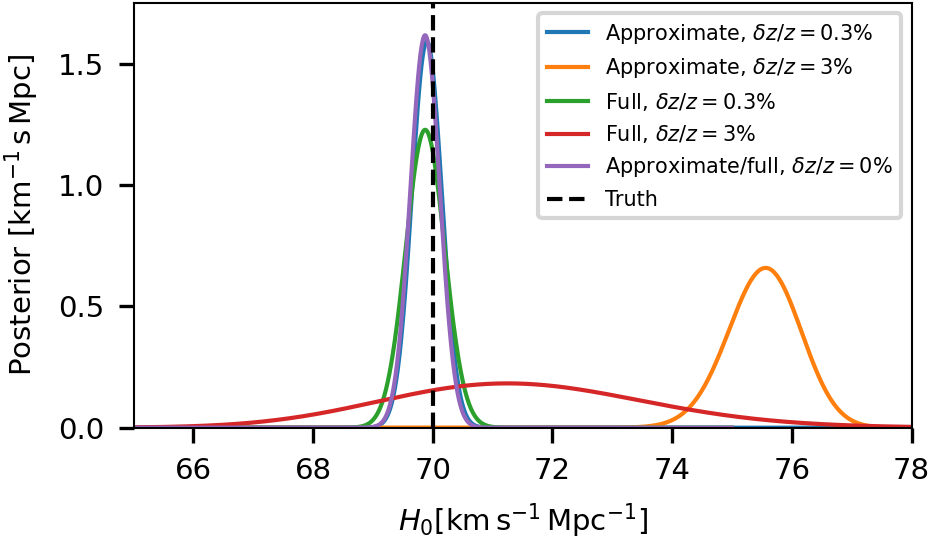

In [334]:
plt.figure(figsize=(3.3,2.0))
H0_array=np.linspace(60.,80.,1000)
H0_true=70.0

plt.plot(H0_array,combined_approximate_dz_0_003,label='Approximate, $\delta z/z = 0.3\%$')
plt.plot(H0_array,combined_approximate_dz_0_03,label='Approximate, $\delta z/z = 3\%$')
plt.plot(H0_array_full_dz_0_003,combined_full_dz_0_003,label='Full, $\delta z/z = 0.3\%$')
plt.plot(H0_array,combined_full_dz_0_03,label='Full, $\delta z/z = 3\%$')
plt.plot(H0_array_perfz,combined_perfz,label='Approximate/full, $\delta z/z = 0\%$')

plt.axvline(H0_true,ls='--',color='k',label='Truth')
ylim=np.max([combined_full_dz_0_03.max(),combined_full_dz_0_003.max(),combined_approximate_dz_0_03.max(),combined_approximate_dz_0_003.max(),combined_perfz.max()])
plt.ylim([0,ylim*1.1])
plt.xlim([65,78])
plt.xlabel(r'$H_0 {\rm[km \,s^{-1} \,Mpc^{-1}]}$')
plt.ylabel(r'Posterior ${\rm[km^{-1} \,s \,Mpc]}$')
plt.tight_layout()
plt.legend(loc="upper right",fontsize=5)

plt.savefig("OneGalaxy_posterior_comparison.pdf")

In [ ]:
# Now we make the pp-plot using the arrays of significances computed above.

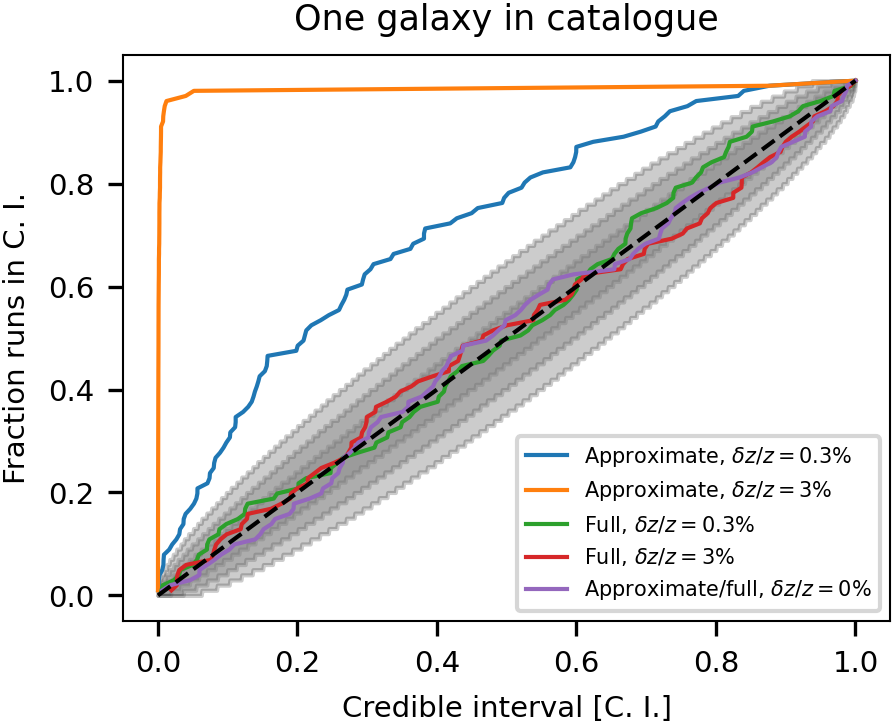

In [352]:
cumul_full_dz_0_003=np.append(np.sort(sigs_full_dz_0_003),1.0)
cumul_full_dz_0_03=np.append(np.sort(sigs_full_dz_0_03),1.0)
cumul_approximate_dz_0_003=np.append(np.sort(sigs_approximate_dz_0_003),1.0)
cumul_approximate_dz_0_03=np.append(np.sort(sigs_approximate_dz_0_03),1.0)
cumul_perfz=np.append(np.sort(sigs_perfz),1.0)

plt.plot(cumul_approximate_dz_0_003,(np.array(range(len(cumul_approximate_dz_0_003)))+1.0)/float(len(cumul_approximate_dz_0_003)),label="Approximate, $\delta z/z = 0.3\%$")
plt.plot(cumul_approximate_dz_0_03,(np.array(range(len(cumul_approximate_dz_0_03)))+1.0)/float(len(cumul_approximate_dz_0_03)),label="Approximate, $\delta z/z = 3\%$")
plt.plot(cumul_full_dz_0_003,(np.array(range(len(cumul_full_dz_0_003)))+1.0)/float(len(cumul_full_dz_0_003)),label="Full, $\delta z/z = 0.3\%$")
plt.plot(cumul_full_dz_0_03,(np.array(range(len(cumul_full_dz_0_03)))+1.0)/float(len(cumul_full_dz_0_03)),label="Full, $\delta z/z = 3\%$")
plt.plot(cumul_perfz,(np.array(range(len(cumul_perfz)))+1.0)/float(len(cumul_perfz)),label="Approximate/full, $\delta z/z = 0\%$")

xvals=np.linspace(0,1,1000)
plt.plot(xvals,xvals,'k--')
plt.legend(loc="lower right",fontsize=5)
plt.xlabel("Credible interval [C. I.]")
plt.ylabel("Fraction runs in C. I.")
plt.title("One galaxy in catalogue")
for ci, alpha in zip([0.68, 0.95, 0.997],[0.1,0.15,0.2]):
    edge_of_bound = (1. - ci) / 2.
    lower = scipy.stats.binom.ppf(1 - edge_of_bound, NH0s,xvals) / NH0s
    upper = scipy.stats.binom.ppf(edge_of_bound, NH0s,xvals) / NH0s
    lower[0] = 0
    upper[0] = 0
    plt.fill_between(xvals, lower, upper, alpha=alpha, color='k')

plt.savefig("OneGalaxy_redshifterrors_threedzs_ppplot.pdf")

### Save data for figures to be used in paper

In [342]:
import pandas as pd
d_post={'H0_standard_dz_0_003': H0_array, 'standard_dz_0_003': combined_standard_dz_0_003, 'H0_standard_dz_0_03': H0_array, 'standard_dz_0_03': combined_standard_dz_0_03, 'H0_corrected_dz_0_003': H0_array_corrected_dz_0_003, 'corrected_dz_0_003': combined_corrected_dz_0_003, 'H0_corrected_dz_0_03': H0_array, 'corrected_dz_0_03': combined_corrected_dz_0_03, 'H0_perfz': H0_array_corrected_perfz, 'perfz': combined_corrected_perfz}
postfile = pd.DataFrame(data=d_post, index=np.arange(1000))
postfile.to_csv('Figure8_data.csv')

In [353]:
#d_ppplot={'CI_standard_dz_0_003': cumul, 'Frac_in_CI_standard_dz_0_003': (np.array(range(len(cumul)))+1.0)/float(len(cumul)), 'CI_corrected_dz_0_003': cumul_corrected_dz_0_003, 'Frac_in_CI_corrected_dz_0_003': (np.array(range(len(cumul_corrected_dz_0_003)))+1.0)/float(len(cumul_corrected_dz_0_003)), 'CI_corrected_dz_0_03': cumul_corrected_dz_0_03, 'Frac_in_CI_corrected_dz_0_03': (np.array(range(len(cumul_corrected_dz_0_03)))+1.0)/float(len(cumul_corrected_dz_0_03)), 'CI_perfz': cumul_anal, 'Frac_in_CI_perfz': (np.array(range(len(cumul_anal)))+1.0)/float(len(cumul_anal))}
d_ppplot={'CI_standard_dz_0_003': cumul_standard_dz_0_003, 'Frac_in_CI_standard_dz_0_003': (np.array(range(len(cumul_standard_dz_0_003)))+1.0)/float(len(cumul_standard_dz_0_003)), 'CI_standard_dz_0_03': cumul_standard_dz_0_03, 'Frac_in_CI_standard_dz_0_03': (np.array(range(len(cumul_standard_dz_0_03)))+1.0)/float(len(cumul_standard_dz_0_03)), 'CI_corrected_dz_0_003': cumul_corrected_dz_0_003, 'Frac_in_CI_corrected_dz_0_003': (np.array(range(len(cumul_corrected_dz_0_003)))+1.0)/float(len(cumul_corrected_dz_0_003)), 'CI_corrected_dz_0_03': cumul_corrected_dz_0_03, 'Frac_in_CI_corrected_dz_0_03': (np.array(range(len(cumul_corrected_dz_0_03)))+1.0)/float(len(cumul_corrected_dz_0_03)), 'CI_perfz': cumul_perfz, 'Frac_in_CI_perfz': (np.array(range(len(cumul_perfz)))+1.0)/float(len(cumul_perfz))}
ppplotfile=pd.DataFrame(data=d_ppplot, index=np.arange(101))
ppplotfile.to_csv('Figure9_data.csv')